In [28]:
import numpy as np
print(np.__version__)

2.2.3


In [29]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


In [31]:
data = data.drop(['PassengerId', 'Pclass'], axis=1)
data

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0
...,...,...,...
886,0,male,27.0
887,1,female,19.0
888,0,female,NaN
889,1,male,26.0


In [32]:
data.isnull().sum()

Survived      0
Sex           0
Age         177
dtype: int64

In [33]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [34]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])
# Display the DataFrame and the number for each gender
print(data)

# Show the LabelEncoder mapping (gender -> encoded number)
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("\nLabel Mapping:", label_mapping)

     Survived  Sex        Age
0           0    1  22.000000
1           1    0  38.000000
2           1    0  26.000000
3           1    0  35.000000
4           0    1  35.000000
..        ...  ...        ...
886         0    1  27.000000
887         1    0  19.000000
888         0    0  29.699118
889         1    1  26.000000
890         0    1  32.000000

[891 rows x 3 columns]

Label Mapping: {'female': 0, 'male': 1}


In [37]:
x = data.drop(data['Survived'])
y = data['Survived']

In [39]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 4.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.0 MB 4.4 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.0 MB 4.9 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.0 MB 5.0 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 4.7 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 4.7 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 3.4 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.0 MB 3.2 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.0 MB 3.1 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.0 MB 3.0 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 2.9 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.0 MB 2.9 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


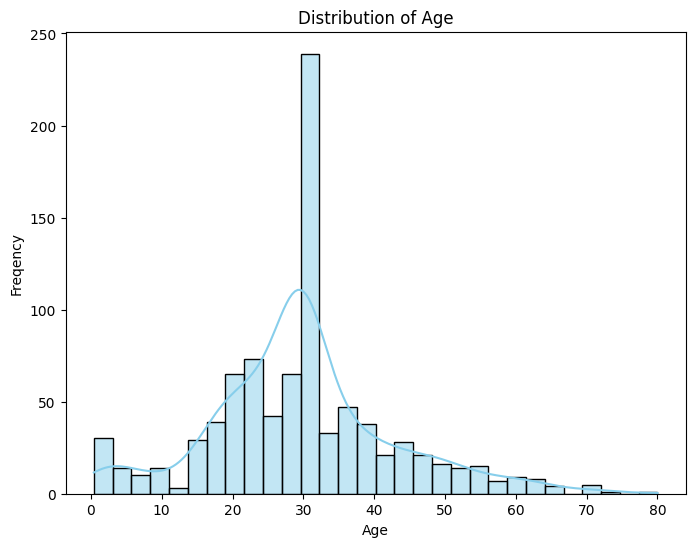

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'].dropna(), kde=True, color='skyblue', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Freqency')
plt.show()

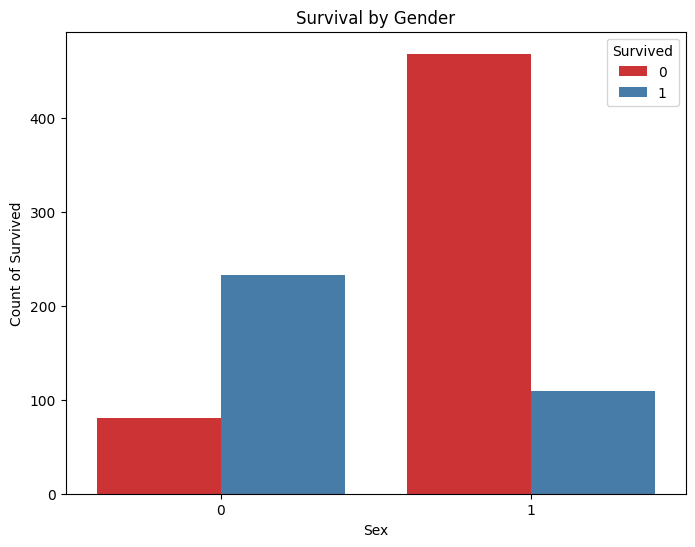

In [54]:
# Survival rate by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=data, palette='Set1')

# Title and axis labels
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count of Survived')

# Show the plot
plt.show()

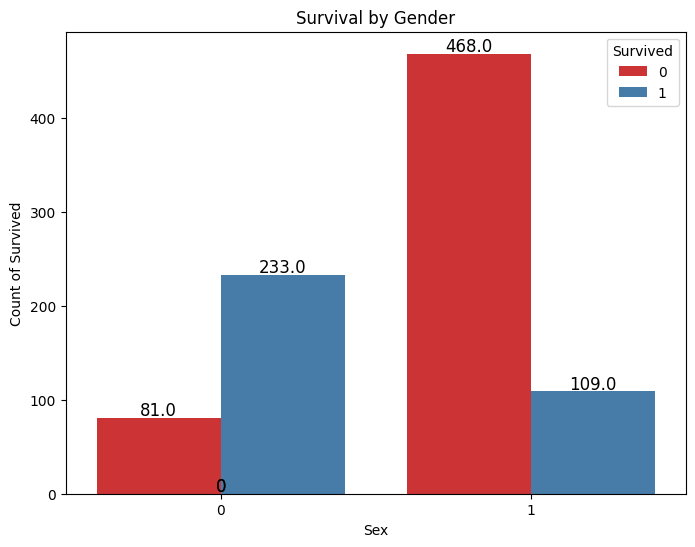

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting survival rate by gender
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', hue='Survived', data=data, palette='Set1')

# Title and axis labels
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count of Survived')

# Adding the count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

In [71]:
from sklearn.model_selection import train_test_split

x = data[['Sex', 'Age']]
y = data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [74]:
from sklearn.ensemble import RandomForestClassifier
predict_model = RandomForestClassifier(n_estimators=100, random_state=42)
predict_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = predict_model.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score (y_pred, y_test)
print('Accuracy: ', accuracy)

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy:  0.776536312849162
Confusion Matrix:
[[86 19]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.74      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [89]:
# Assuming 'predict_model' is your trained model
input_data = np.array([0, 30]).reshape(1, -1)  # Reshape to 2D (1 sample, 2 features)

# Predict survival probabilities
probabilities = predict_model.predict_proba(input_data)

# Get the probability for survival (class 1)
survival_probability = probabilities[0][1]  # Probability of the class "Survived" (1)

# Print the survival probability
print(f"Survival Probability: {survival_probability:.4f}")

Survival Probability: 0.7683


C:\Users\user\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [99]:
person1 = np.array([0, 30]).reshape(1, -1)

probabilities = predict_model.predict_proba(person1)

survival_probability = probabilities[0][1]

print (f'the ratio of survival: {survival_probability: .2f}')

the ratio of survival:  0.77


C:\Users\user\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [100]:
person2 = np.array([1, 40]).reshape(1, -1)

predictions = predict_model.predict(person2)

result = predictions[0]  # Getting the prediction for the single sample

if result >= 0.5:
    print('survived', result)
else:
    print('not_survived')

not_survived


C:\Users\user\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
